<a href="https://colab.research.google.com/github/gundaminpde/test1/blob/main/NLP_in_Korean_baby_step_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

＜모두의 한국어 텍스트 분석 with 파이썬＞이라는 교재의 github 내용을 실습해 보았습니다.

자료 출처입니다.

https://github.com/pytextbook/pytextbook/tree/main

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install koreanize-matplotlib
!pip install konlpy --upgrade
!pip install tqdm --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.4 MB/s eta 0:00:00


In [3]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [4]:
# 데이콘의 해당 데이터셋은 CC-BY-4.0 라이센스입니다.
# 데이터 출처 : https://dacon.io/competitions/official/235747/data
# 로컬 PC에서 실습 시 직접 데이콘 사이트에 회원가입하고 다운로드 해주세요.

import os, platform

base_path = "data/klue/"
file_name = "dacon-klue-open-zip"

def file_exist_check(base_path):
    if os.path.exists(f"{base_path}train_data.csv"):
        print(f"{os.getcwd()}/{base_path} 경로에 파일이 있음")
        return

    if not os.path.exists(base_path):
        os.makedirs(base_path)

    if platform.system() == "Linux":
        print(f"파일을 다운로드 하고 {base_path} 경로에 압축을 해제함")
        !wget https://bit.ly/{file_name}
        !unzip {file_name} -d {base_path}
        return
    else:
        print(f"""https://dacon.io/competitions/official/235747/data 에서 다운로드 하고
              실습 경로 {os.getcwd()}/{base_path}에 옮겨주세요.""")
        return

file_exist_check(base_path)

파일을 다운로드 하고 data/klue/ 경로에 압축을 해제함
--2023-08-02 14:20:42--  https://bit.ly/dacon-klue-open-zip
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1jPnwbGKd4eCIZzt5fZshyPf4stGdvcJC [following]
--2023-08-02 14:20:42--  https://drive.google.com/uc?export=download&id=1jPnwbGKd4eCIZzt5fZshyPf4stGdvcJC
Resolving drive.google.com (drive.google.com)... 74.125.141.100, 74.125.141.101, 74.125.141.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q6s7u80330p58n1jrjt4pfej2t5o21sr/1690986000000/17163383815352082166/*/1jPnwbGKd4eCIZzt5fZshyPf4stGdvcJC?e=download&uuid=9ae68ebb-2738-4a2d-93b2-72343124267c [following]
--2

In [5]:
# 학습, 예측 데이터셋을 불러온다.
train = pd.read_csv(os.path.join(base_path, "train_data.csv"))
test = pd.read_csv(os.path.join(base_path, "test_data.csv"))
train.shape, test.shape

((45654, 3), (9131, 2))

In [6]:
# 토픽을 불러온다.
topic = pd.read_csv(os.path.join(base_path, "topic_dict.csv"))
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [7]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [8]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [9]:
topic["topic"].values

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

In [10]:
# 전처리를 위해 데이터 병합
raw = pd.concat([train, test])
raw.shape

(54785, 3)

In [11]:
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


# **이것이 포인트**

In [12]:
df = raw.merge(topic, how="left")
df.shape

(54785, 4)

In [13]:
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


In [14]:
# test는 결측치로 되어 있기 때문에 빈도수에 포함되지 않습니다.
df["topic_idx"].value_counts()

4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: topic_idx, dtype: int64

<Axes: xlabel='count', ylabel='topic'>

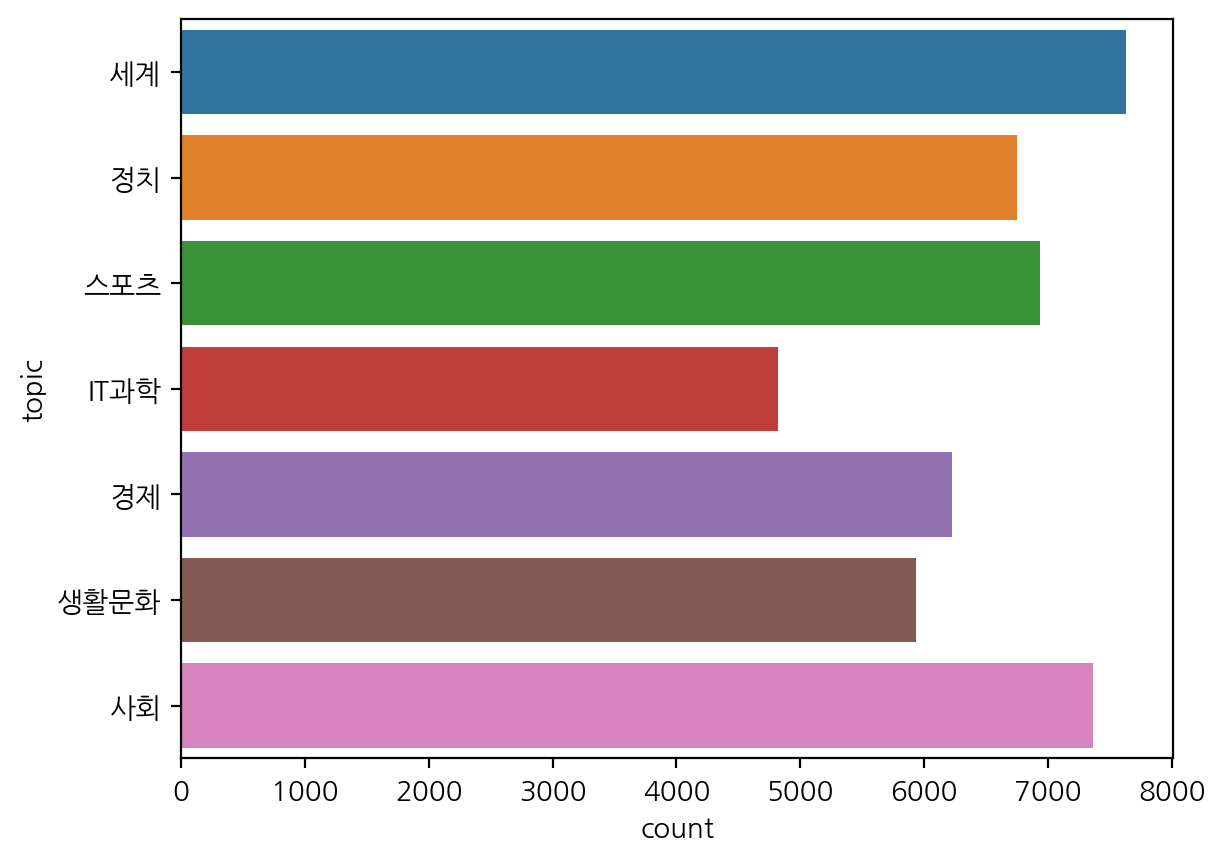

In [15]:
# df 로 빈도수를 구했지만 test 데이터는 topic이 결측치라 포함되지 않습니다.
sns.countplot(data=df, y="topic")

In [16]:
# 문자 길이, 단어 빈도, 유일 어절의 빈도수를 알기 위한 파생 변수 만들기
df["len"] = df["title"].apply(lambda x : len(x))
df["word_count"] = df["title"].apply(lambda x : len(x.split()))
df["unique_word_count"] = df["title"].apply(lambda x : len(set(x.split())))

In [17]:
# 파생변수가 잘 만들어졌는지 확인한다.
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


<Axes: xlabel='unique_word_count', ylabel='Count'>

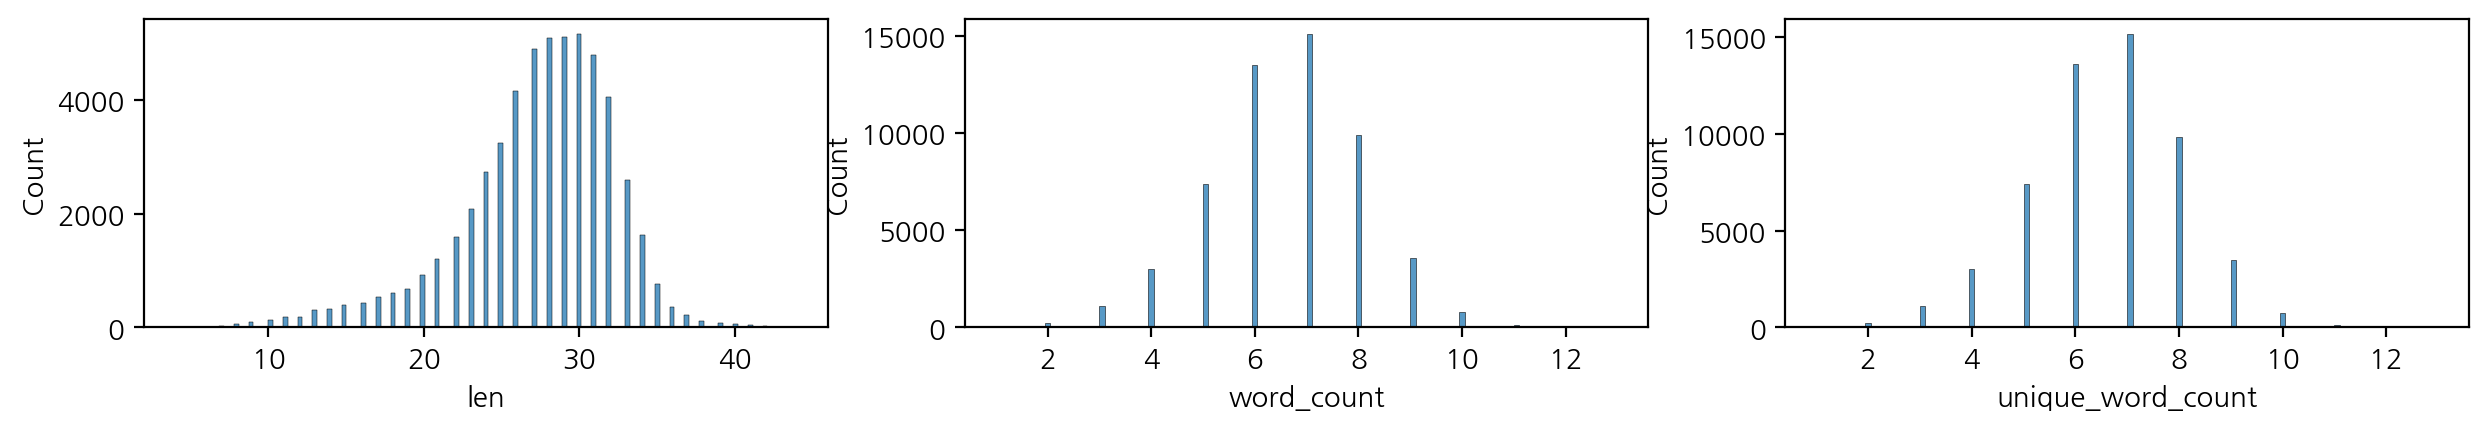

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.histplot(df["len"], ax=axes[0])
sns.histplot(df["word_count"], ax=axes[1])
sns.histplot(df["unique_word_count"], ax=axes[2])

In [26]:
df[["len", "word_count", "unique_word_count"]].describe()

,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


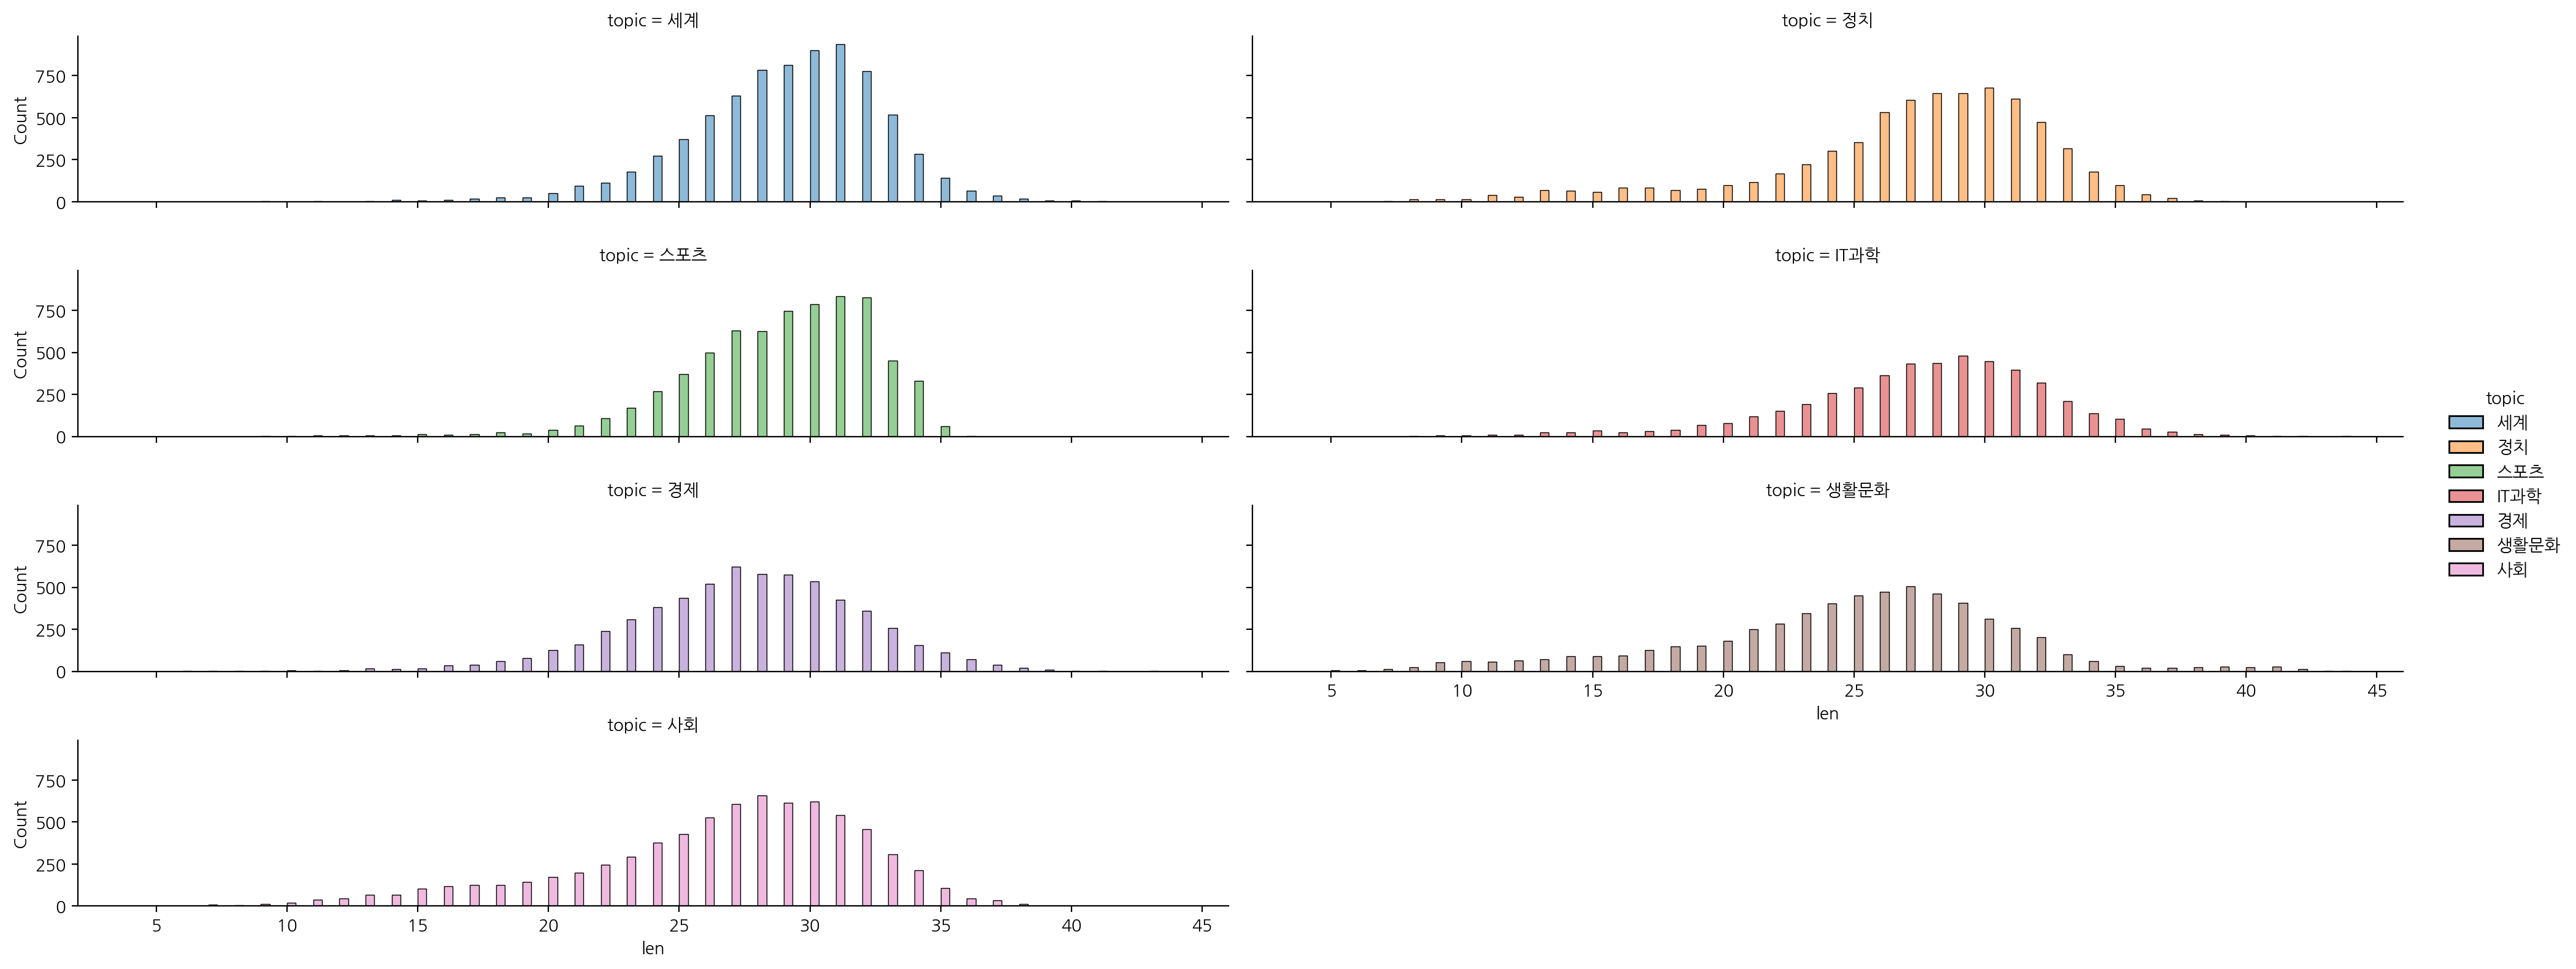

In [20]:
sns.displot(data=df, x="len",
            hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

In [21]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '합니다', '하는', '할', '하고', '한다',
             '그리고', '입니다', '그 ', ' 등', '이런', ' 것 ', ' 및 ',' 제 ', ' 더 ']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [22]:
df["title"] = df["title"].map(remove_stopwords)

In [23]:
label_name = "topic_idx"